# Predictive Model: Logistic Regression
Importing libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math
from sklearn import preprocessing

In [18]:
dataset=pd.read_csv("dataset.csv")


In [19]:
del dataset['Unnamed: 32']


## Exploratory Data Analysis

In [20]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Data to Train/Test Sets
Creating train/test sets using the train_test_split function. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing.

In [21]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
y_train

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

## Fitting the data to a logistic regression model

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
lg= LogisticRegression()

In [24]:
lg.fit(X_train,y_train)

E:\anaconda recent\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy on the training dataset

In [25]:
score = lg.score(X_train, y_train)*100
score

95.38461538461539

### Accuracy on the test dataset

In [26]:
score = lg.score(X_test, y_test)*100
score

98.24561403508771

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg.predict(X_test))
print(cm)

[[73  0]
 [ 2 39]]


### Applying Feature Scaling(Normalisation) to the dataset

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_minmax =  scaler.fit_transform(X_train)
X_test_minmax=scaler.fit_transform(X_test)

In [29]:
lg.fit(X_train_minmax,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction=lg.predict(X_test_minmax)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [31]:
print(confusion_matrix(y_test,prediction))

[[72  1]
 [ 1 40]]


### Accuracy on the test dataset (applying normalization)

In [32]:
from sklearn.metrics import accuracy_score
a1=str(accuracy_score(prediction,y_test))
print(a1)

0.9824561403508771


### Applying Standardization to the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [34]:
lg.fit(X_train_sc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predict=lg.predict(X_test_sc)
predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [36]:
print(confusion_matrix(y_test,predict))

[[73  0]
 [ 1 40]]


### Accuracy on the training dataset

In [37]:
score = lg.score(X_train_sc, y_train)*100
score

98.68131868131869

### Accuracy on the test dataset (applying standardization)


In [38]:
r = str(accuracy_score(predict,y_test))
print("Test Dataset accuracy of this model after Standardization is : " + r)

Test Dataset accuracy of this model after Standardization is : 0.9912280701754386


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



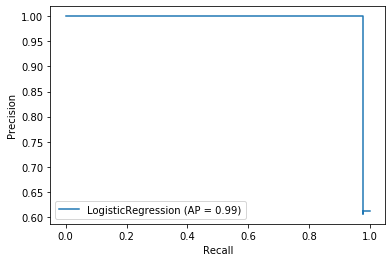

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lg, X_test_sc, y_test)
#disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

### Plotting pairwise relationships to check the correlations between the mean features.



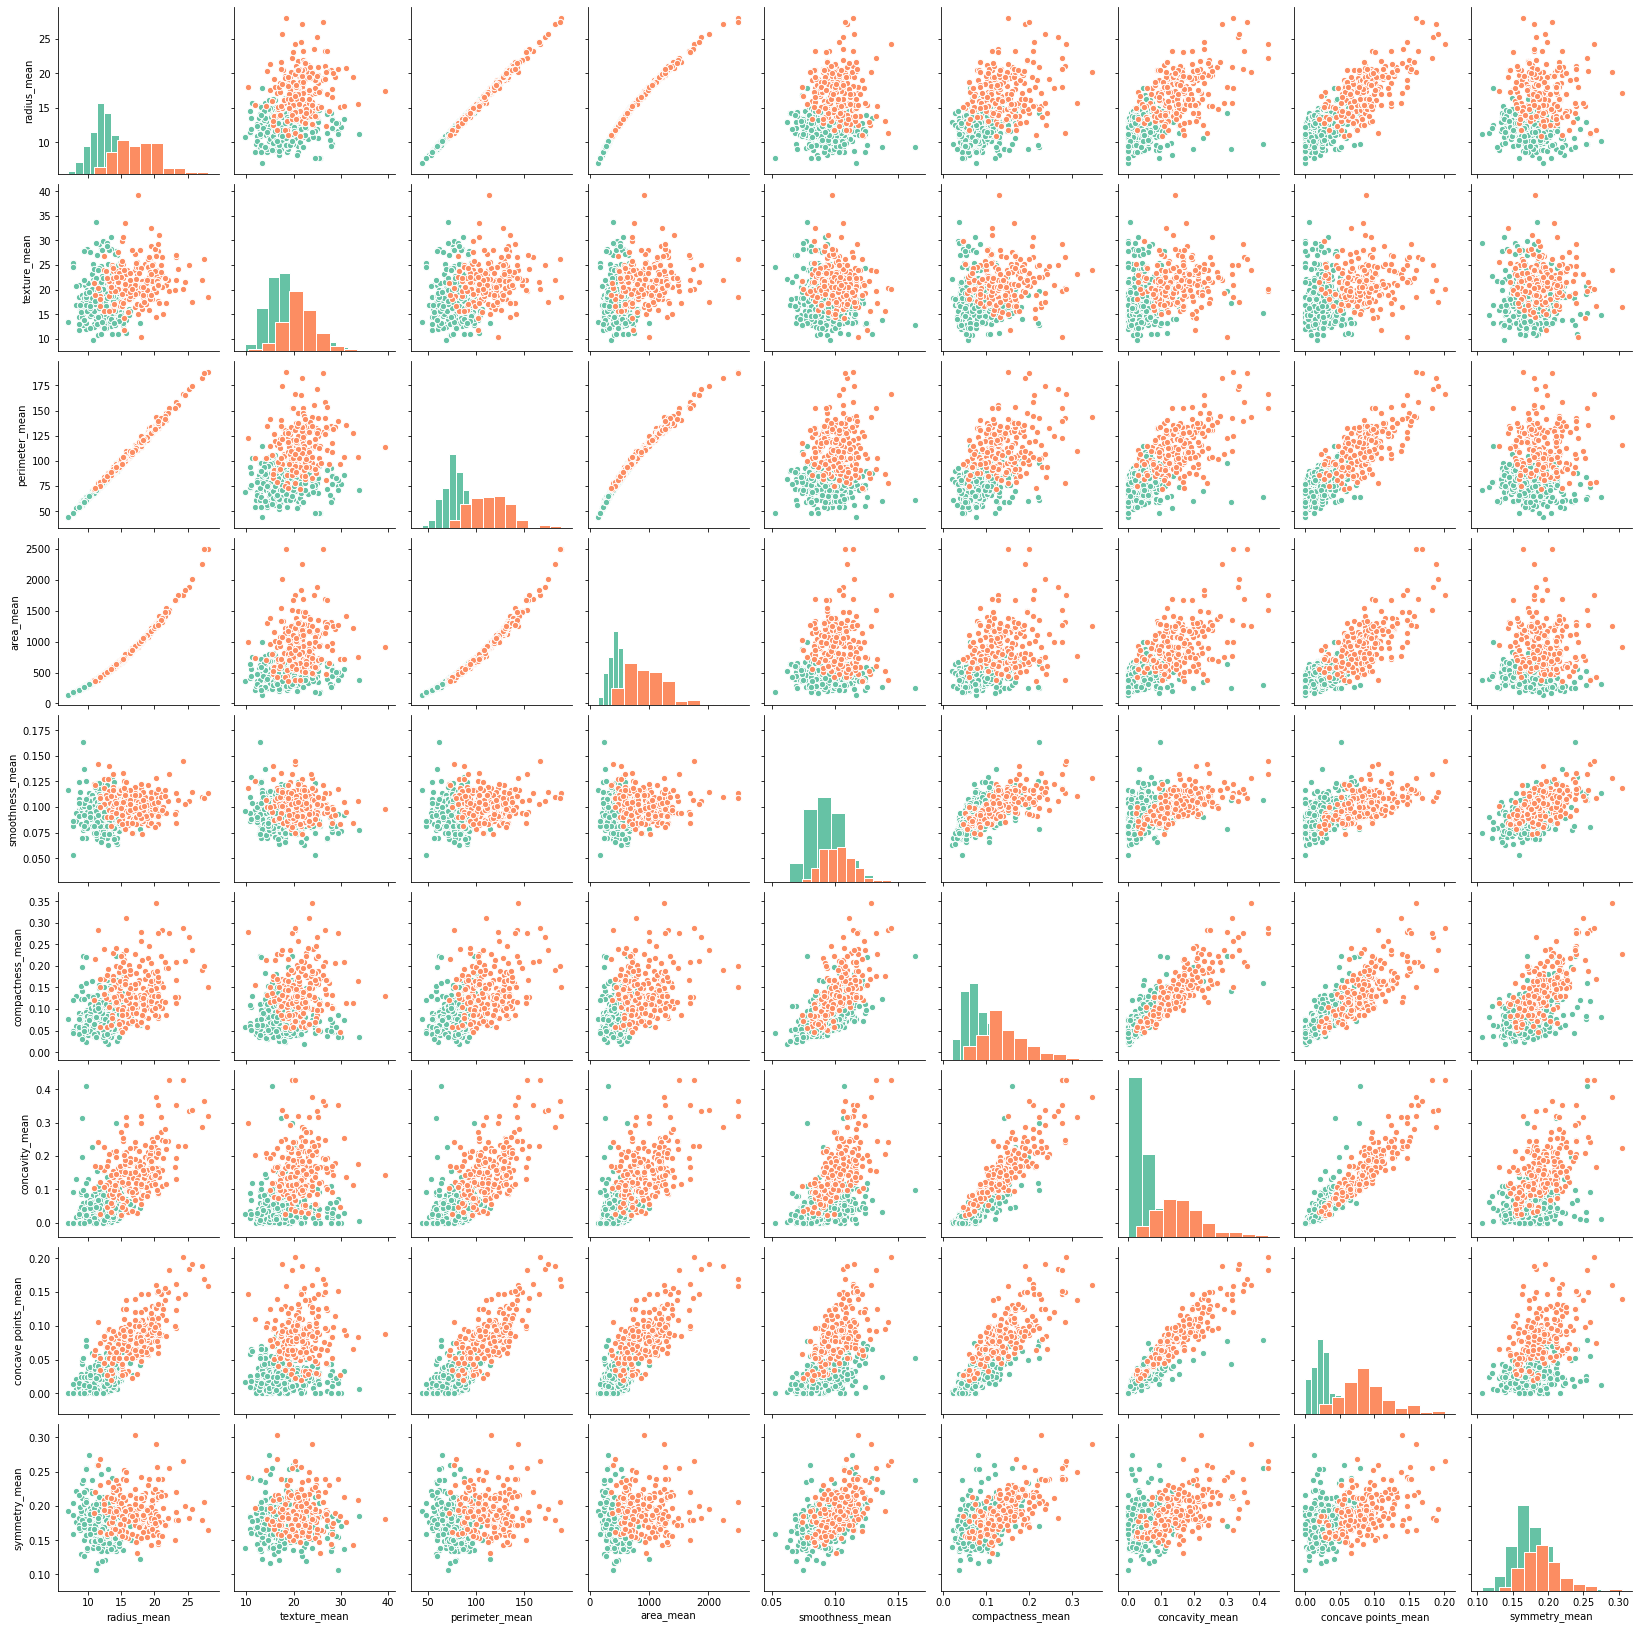

In [41]:
g = sns.PairGrid(dataset.iloc[:, 1:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

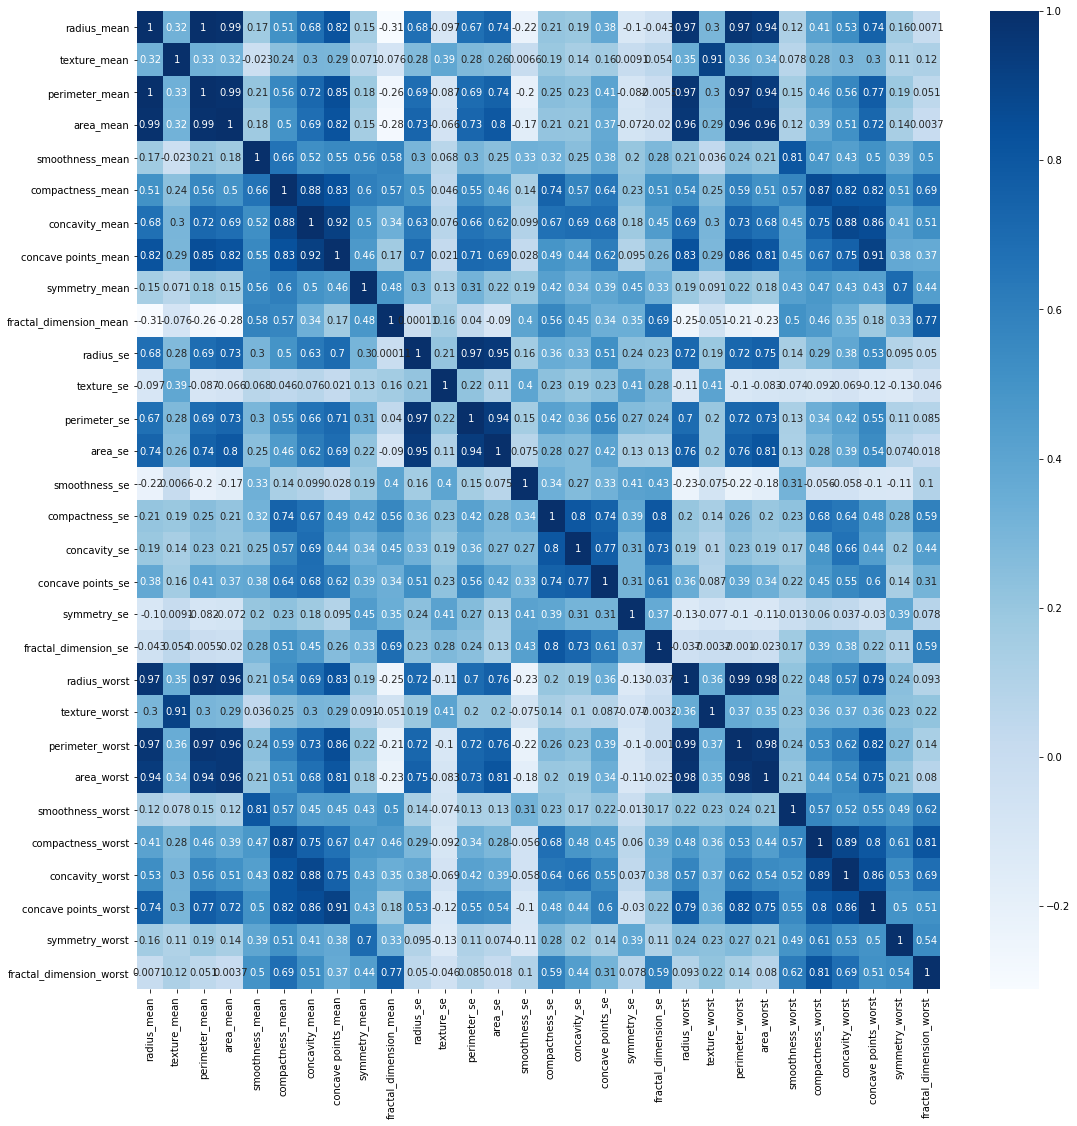

In [42]:
dataset_corr = dataset.iloc[:, 2:].corr()
plt.figure(figsize=(18,18))
sns.heatmap(dataset_corr, cmap="Blues", annot=True)
plt.show()

#### As it was expected there are very strong correlations between radius, perimeter and area. Concavity and concave points are also highly correlated. 
Perimeter_worst and area_worst,   
radius_worst----perimeter_worst,area_worst   
radius_se---perimeter_se,area_se   
perimeter_mean----perimeter_worst,   
radius_mean----radius_worst   
area_mean----area_worst   
perimeter_worst----radius_worst   
These highly correlated features result in redundant information. It is suggested to remove highly correlated features to avoid a predictive bias for the information contained in these features.

### Removing Highly Correlated Features and executing Again. Investigating if manually removing features with a correlation higher than 0.9, can benefit the algorithm performance.

In [43]:
df = dataset[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean','concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se','concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se','smoothness_worst',
            'compactness_worst', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [46]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
score = lg.score(X_train, y_train)*100
print("Accuracy on the train data=%f"%score)

Accuracy on the train data=92.747253


## Accuracy on the test data:

In [48]:
score = lg.score(X_test, y_test)*100
print("Accuracy on the test data=%f"%score)

Accuracy on the test data=95.614035


In [49]:
from sklearn.metrics import classification_report
predictions = lg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        73
           1       1.00      0.88      0.94        41

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### There is a significant decrease in algorithm's accuracy and recall mostly for the malignant class. It's difficult to select manually the best features especially for datasets with many features correlated. Sometimes, ambiguity can occur when three or more variables are correlated. For example, if feature 1 is correlated with feature 2, while feature 2 is correlated with feature 3 but not feature 1, which one is better to remove? To resolve this automatically, dimensionality reduction methods are used such as Principal Component Analysis can be employed.